In [73]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn import linear_model
from scipy import stats
from matplotlib import cm
from pathlib import Path

plt.rc('font', family='Malgun Gothic')
plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = '#f5f5f5'
warnings.filterwarnings('ignore')

colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']


In [74]:
df = pd.read_csv('./bike.csv', encoding='cp949')
df.drop(columns=["대여일자", "대여소번호", "대여소명", "운동량", "탄소량", "이동거리(M)"], inplace=True)

In [75]:
df['1건당 이용시간'] = df['이용시간(분)'] / df['이용건수']
df.head(10)

,대여구분코드,성별,연령대코드,이용건수,이용시간(분),1건당 이용시간
0,일일(비회원),\N,기타,1,6,6.000000
1,일일(회원),M,50대,19,117,6.157895
2,정기,\N,20대,12,75,6.250000
3,정기,\N,60대,4,22,5.500000
4,정기,M,20대,2,4,2.000000
5,정기,M,40대,12,120,10.000000
6,정기,M,50대,12,293,24.416667
7,정기,M,60대,4,147,36.750000
8,정기,M,기타,1,41,41.000000
9,일일(회원),M,40대,15,329,21.933333


In [76]:
# 전처리
df.dropna(inplace=True)
df.drop(df[df['성별'] == '\\N'].index, inplace=True)
df.drop(df[df['연령대코드'] == '기타'].index, inplace=True)
df['성별'] = df['성별'].str.upper()

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66130 entries, 1 to 133100
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여구분코드    66130 non-null  object 
 1   성별        66130 non-null  object 
 2   연령대코드     66130 non-null  object 
 3   이용건수      66130 non-null  int64  
 4   이용시간(분)   66130 non-null  int64  
 5   1건당 이용시간  66130 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 3.5+ MB


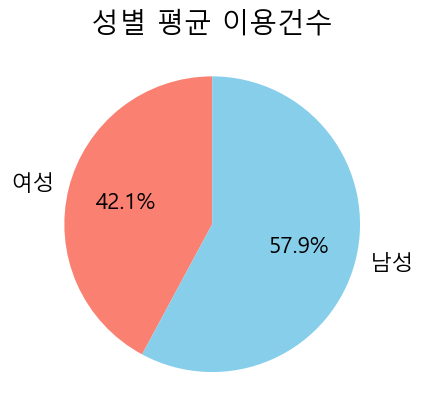

In [78]:
# 성별 평균 이용건수
tmp = df.groupby('성별')['이용건수'].mean()
plt.title("성별 평균 이용건수", fontsize=20)
plt.pie(tmp.values, labels=['여성', '남성'], startangle=90, autopct='%.1f%%', colors=['salmon', 'skyblue'], textprops={'fontsize':16})
plt.show()

남성들이 따릉이를 더 자주 사용함. (15% 정도)

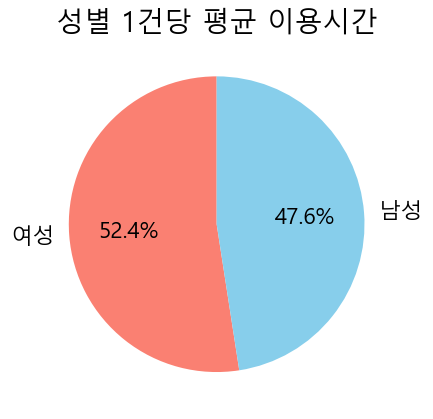

In [79]:
# 성별 1건당 이용시간
df_sex = df.groupby('성별')['1건당 이용시간'].mean()
# print(df_sex)

plt.title("성별 1건당 평균 이용시간", fontsize=20)
plt.pie(df_sex.values, labels=["여성", "남성"], startangle=90, autopct='%.1f%%', colors=['salmon', 'skyblue'], textprops={'fontsize':16})
plt.show()

자주 사용하는 이용객들은 남성들이나 1회당 이용시간이 긴 쪽은 여성 사용자들임.

<AxesSubplot: xlabel='연령대코드', ylabel='이용건수'>

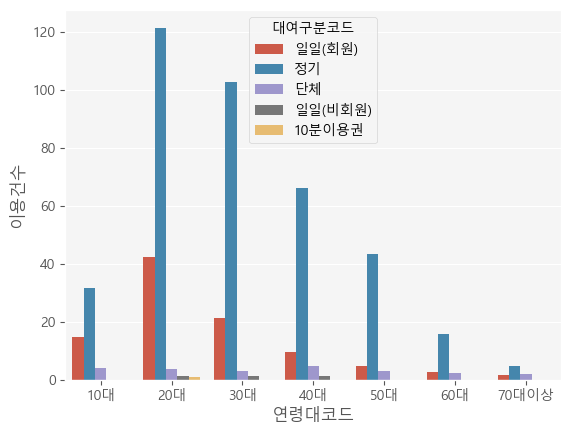

In [80]:
df_age = df.sort_values(by="연령대코드")
sns.barplot(data=df_age, x='연령대코드', y='이용건수', hue='대여구분코드', ci=None)

10대를 제외하고 연령대가 높아질수록 이용건수가 줄어드는 경향이다.

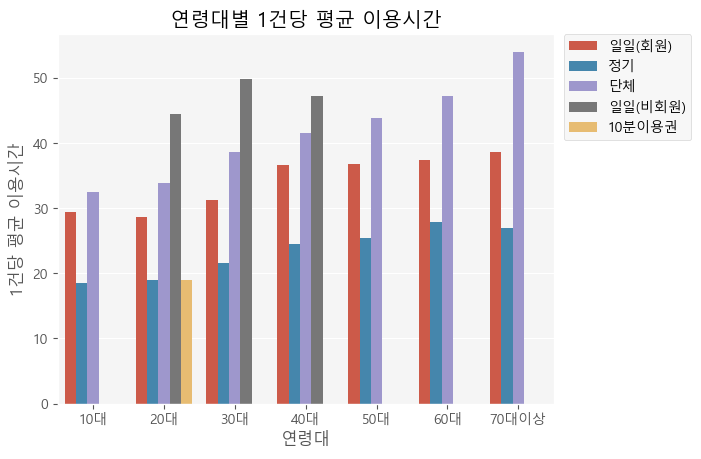

In [81]:
sns.barplot(data=df_age, x='연령대코드', y='1건당 이용시간', hue='대여구분코드', ci=None)
plt.title("연령대별 1건당 평균 이용시간")
plt.xlabel("연령대")
plt.ylabel('1건당 평균 이용시간')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

연령대가 올라갈수록 요금제와 상관없이 평균적으로 이용시간이 늘어나는 경향인 것을 볼 수 있다.

정기 요금제는 보통 20, 30대가 많음 -> 출퇴근용으로 짧게 여러번 이용하는 편.
한번 탈 때 길게 타는 사람들은 40대 이상 -> 출퇴근용으로 타지 않음. 취미생활 또는 모임용으로 이용.


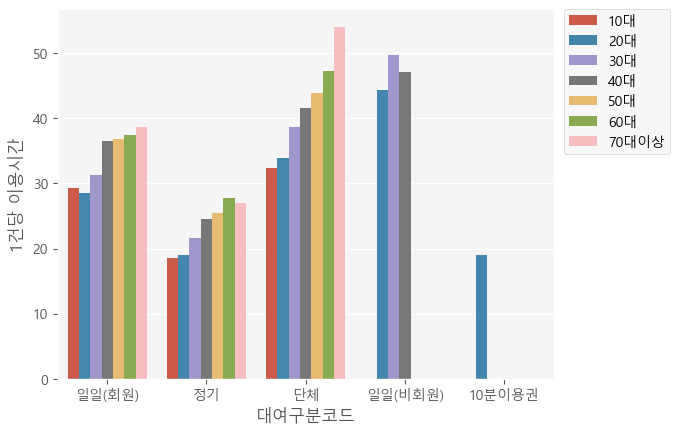

In [82]:
sns.barplot(df_age, x='대여구분코드', y='1건당 이용시간', hue='연령대코드', ci=None)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

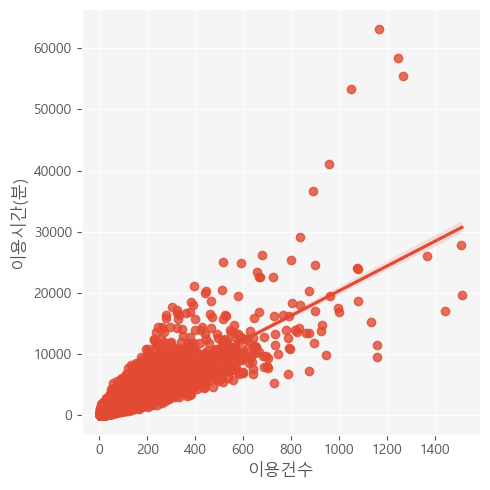

In [83]:
sns.lmplot(df, x='이용건수', y='이용시간(분)')

이용건수 vs. 이용시간(분) 상관관계 있음 : 이용건수가 많으면 당연히 시간이 늘어나기 때문에 어느정도 상관관계는 있음.

Text(0.5, 1.0, '이용건수 vs. 1건당 이용시간')

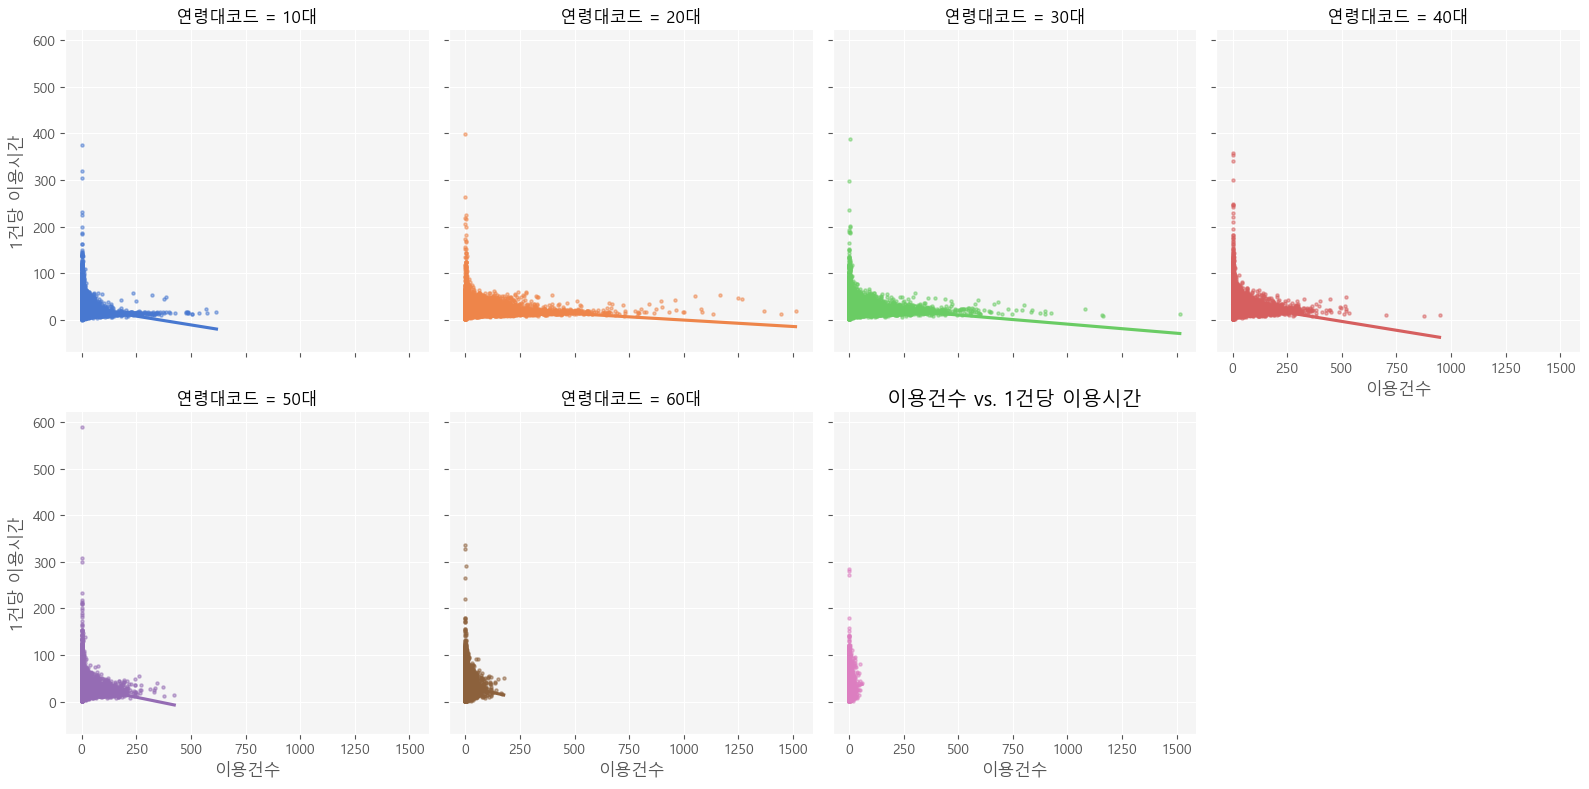

In [84]:
sns.lmplot(df_age, x='이용건수', y='1건당 이용시간', scatter_kws={'s':5, 'alpha':0.5}, hue="연령대코드", col="연령대코드",
col_wrap=4, palette="muted", ci=None, height=4)
plt.title("이용건수 vs. 1건당 이용시간")
# sns.lmplot(df, x='이용건수', y='1건당 이용시간')

Text(0.5, 1.0, '이용건수 vs. 1건당 이용시간')

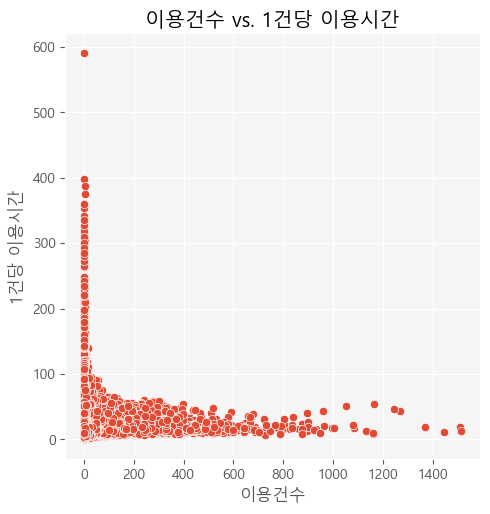

In [85]:
sns.relplot(df_age, x="이용건수", y="1건당 이용시간")
plt.title("이용건수 vs. 1건당 이용시간")

이용건수 vs. 1건당 이용시간 상관관계 없음


In [86]:
df.corr()

,이용건수,이용시간(분),1건당 이용시간
이용건수,1.000000,0.900005,-0.159509
이용시간(분),0.900005,1.000000,-0.023167
1건당 이용시간,-0.159509,-0.023167,1.000000


---

## 실험

In [87]:
df2 = pd.read_csv('./bike.csv', encoding='cp949')
df2.dropna(inplace=True)
df2.drop(df2[df2['성별'] == '\\N'].index, inplace=True)
df2.drop(df2[df2['연령대코드'] == '기타'].index, inplace=True)
df2['성별'] = df2['성별'].str.upper()
df2.drop(columns=["대여일자", "대여소번호", "대여소명", "운동량", "탄소량", "이동거리(M)"], inplace=True)
df2['1건당 이용시간'] = df2['이용시간(분)'] / df2['이용건수']

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66130 entries, 1 to 133100
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여구분코드    66130 non-null  object 
 1   성별        66130 non-null  object 
 2   연령대코드     66130 non-null  object 
 3   이용건수      66130 non-null  int64  
 4   이용시간(분)   66130 non-null  int64  
 5   1건당 이용시간  66130 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 3.5+ MB


In [88]:
df2 = df2[(np.abs(stats.zscore(df2['이용건수'])) < 3)]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64773 entries, 1 to 133100
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여구분코드    64773 non-null  object 
 1   성별        64773 non-null  object 
 2   연령대코드     64773 non-null  object 
 3   이용건수      64773 non-null  int64  
 4   이용시간(분)   64773 non-null  int64  
 5   1건당 이용시간  64773 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 3.5+ MB


<AxesSubplot: xlabel='대여구분코드', ylabel='이용건수'>

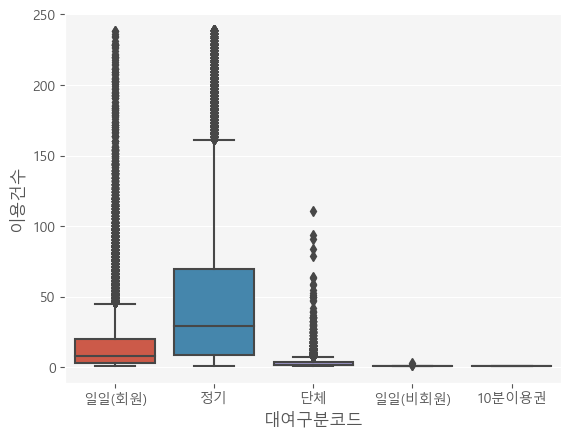

In [89]:
sns.boxplot(data=df2, x='대여구분코드', y='이용건수')

In [90]:
import matplotlib.font_manager as font_manager
font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['C:\\Windows\\Fonts\\MOD20.TTF',
 'C:\\Windows\\Fonts\\seguisli.ttf',
 'C:\\Windows\\Fonts\\seguili.ttf',
 'C:\\Users\\user\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NotoSansKR-Regular.otf',
 'C:\\Users\\user\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Roboto-Thin_0.ttf',
 'C:\\Windows\\Fonts\\malgunbd.ttf',
 'C:\\Windows\\Fonts\\VLADIMIR.TTF',
 'C:\\Windows\\Fonts\\H2MJSM.TTF',
 'C:\\Windows\\Fonts\\H2PORL.TTF',
 'C:\\Windows\\Fonts\\GOTHICB.TTF',
 'C:\\Windows\\Fonts\\JUMJA.TTF',
 'C:\\Windows\\Fonts\\H2HDRM.TTF',
 'C:\\Windows\\Fonts\\gadugib.ttf',
 'C:\\Windows\\Fonts\\CALIFR.TTF',
 'C:\\Windows\\Fonts\\malgun.ttf',
 'C:\\Windows\\Fonts\\BRLNSB.TTF',
 'C:\\Windows\\Fonts\\NGULIM.TTF',
 'C:\\Users\\user\\AppData\\Local\\Microsoft\\Windows\\Fonts\\Roboto-Light_0.ttf',
 'C:\\Windows\\Fonts\\H2GPRM.TTF',
 'C:\\Windows\\Fonts\\BOD_B.TTF',
 'C:\\Windows\\Fonts\\MISTRAL.TTF',
 'C:\\Windows\\Fonts\\BOD_BI.TTF',
 'C:\\Windows\\Fonts\\HANBatangB.ttf',
 'C:\\Windows\\Fonts\\ROCKI.TTF',
 'C

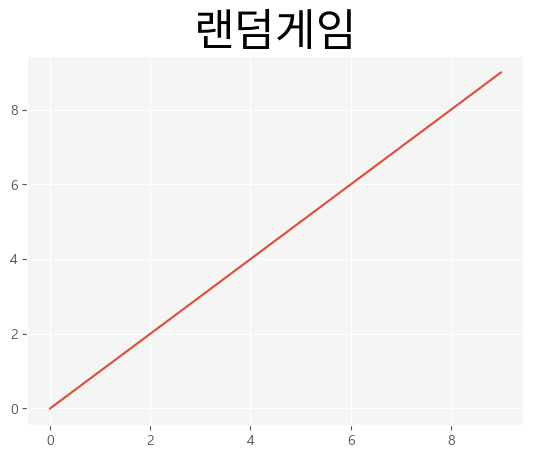

In [97]:
fig, ax = plt.subplots()
ax.plot(range(10))

prop = font_manager.FontProperties(fname='D:\\C3cube\\DA_Nocode\\bike\\NotoSansCJKkr-Regular.otf')
ax.set_title("랜덤게임", fontproperties=prop, size=32)

plt.show()

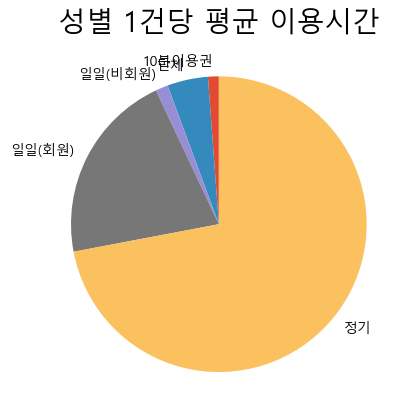

In [103]:
# 성별 1건당 이용시간
df_sex = df.groupby('성별')['1건당 이용시간'].mean()
# print(df_sex)
xx = df_age.groupby('대여구분코드')['이용건수'].mean()

plt.title("성별 1건당 평균 이용시간", fontsize=20)
plt.pie(xx.values, labels=xx.index, startangle=90)
plt.show()

In [112]:
xxx = pd.read_csv("../seoul/Seoul_Park.csv")
xxx.drop(columns=['어른', '청소년', '어린이', '외국인', '단체'], inplace=True)
xxx.head()

,날짜,요일,공휴일,날씨,유료합계,무료합계,총계
0,2016-01-01,금,1,구름 조금,"3,359","1,023","4,382"
1,2016-01-02,토,1,구름 많음,"5,173","2,092","7,265"
2,2016-01-03,일,1,구름 많음,"3,008","1,549","4,557"
3,2016-01-04,월,0,구름 많음,890,800,"1,690"
4,2016-01-05,화,0,구름 많음,416,840,"1,256"


In [113]:
from pathlib import Path
filepath = Path('../seoul/out.csv')
xxx.to_csv(filepath, index=False, encoding="utf-8-sig")